In [1]:
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

In [2]:
#create a new file called turnstilesdata to merge all the downloaded file
!touch turnstilesdata.txt
filenames = ['mta20170506.txt','mta20170520.txt']
#use a for loop to merge downloaded file in a list
with open('/Users/windflower715/nyc18_ds14/student_submissions/challenges/01_mta/turnstilesdata.txt','w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
                

In [3]:
csvfile = open('turnstilesdata.txt')
tsdata = csv.reader(csvfile)
#get rid of the white space in each entry in tsdata(list comprehension)
rows = [[cell.strip() for cell in row] for row in tsdata]

In [4]:
# #excluding the header line while making dictionary
#assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
#                        'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
#                        'EXITS']

In [5]:
from collections import defaultdict
turnstile= defaultdict(list)
for row in rows: #why does [for row in tsdata:] not work ?
    key = row[:4]
    key = tuple(key)
    value = row[4:]
    turnstile[key].append(value)
list(turnstile.items())[0]
#turnstile is the solution to challenge 1

(('B016', 'R098', '00-00-01', 'CHURCH AV'),
 [['BQ',
   'BMT',
   '04/29/2017',
   '00:00:00',
   'REGULAR',
   '0001413069',
   '0003043852'],
  ['BQ',
   'BMT',
   '04/29/2017',
   '04:00:00',
   'REGULAR',
   '0001413097',
   '0003044002'],
  ['BQ',
   'BMT',
   '04/29/2017',
   '08:00:00',
   'REGULAR',
   '0001413229',
   '0003044090'],
  ['BQ',
   'BMT',
   '04/29/2017',
   '12:00:00',
   'REGULAR',
   '0001413460',
   '0003044316'],
  ['BQ',
   'BMT',
   '04/29/2017',
   '16:00:00',
   'REGULAR',
   '0001413704',
   '0003044734'],
  ['BQ',
   'BMT',
   '04/29/2017',
   '20:00:00',
   'REGULAR',
   '0001413895',
   '0003045267'],
  ['BQ',
   'BMT',
   '04/30/2017',
   '00:00:00',
   'REGULAR',
   '0001414009',
   '0003045645'],
  ['BQ',
   'BMT',
   '04/30/2017',
   '04:00:00',
   'REGULAR',
   '0001414029',
   '0003045815'],
  ['BQ',
   'BMT',
   '04/30/2017',
   '08:00:00',
   'REGULAR',
   '0001414115',
   '0003045896'],
  ['BQ',
   'BMT',
   '04/30/2017',
   '12:00:00',
   'R

# challenge 2

In [6]:
import dateutil.parser
from datetime import datetime

In [7]:
#construct a new timeseries dictionary using datetime.strptime
#using list comprehension to iterate through the turnstile dictionary

mtatimeseries = {key:[(datetime.strptime(date + time,'%m/%d/%Y%X'),int(entries))
                      for _,_,date,time,_,entries,_ in rows] 
                 for key, rows in turnstile.items()}

list(mtatimeseries.items())[0]

(('B016', 'R098', '00-00-01', 'CHURCH AV'),
 [(datetime.datetime(2017, 4, 29, 0, 0), 1413069),
  (datetime.datetime(2017, 4, 29, 4, 0), 1413097),
  (datetime.datetime(2017, 4, 29, 8, 0), 1413229),
  (datetime.datetime(2017, 4, 29, 12, 0), 1413460),
  (datetime.datetime(2017, 4, 29, 16, 0), 1413704),
  (datetime.datetime(2017, 4, 29, 20, 0), 1413895),
  (datetime.datetime(2017, 4, 30, 0, 0), 1414009),
  (datetime.datetime(2017, 4, 30, 4, 0), 1414029),
  (datetime.datetime(2017, 4, 30, 8, 0), 1414115),
  (datetime.datetime(2017, 4, 30, 12, 0), 1414293),
  (datetime.datetime(2017, 4, 30, 16, 0), 1414506),
  (datetime.datetime(2017, 4, 30, 20, 0), 1414664),
  (datetime.datetime(2017, 5, 1, 0, 0), 1414736),
  (datetime.datetime(2017, 5, 1, 4, 0), 1414756),
  (datetime.datetime(2017, 5, 1, 8, 0), 1415055),
  (datetime.datetime(2017, 5, 1, 12, 0), 1415421),
  (datetime.datetime(2017, 5, 1, 16, 0), 1415643),
  (datetime.datetime(2017, 5, 1, 20, 0), 1415811),
  (datetime.datetime(2017, 5, 2, 0,

# challenge 3

In [8]:
#a very smart way to get daily difference
daily = defaultdict(list)
for k, v in mtatimeseries.items():
    previous = 0
    current = 0
    delta = 0
    for line in v:
        if v.index(line) % 6 == 0:#time = 00:00 when the day starts
            dailyvalue = []
            # convert datetime to date and append to daily value
            dailyvalue.append(line[0].date())
            # current is entries
            current = line[1]
            # today's minus yesterday's
            delta = current - previous
            dailyvalue.append(delta)
            # append date/value pair to key
            # exclude first date of every key
            if previous != 0 and delta >= 0: 
                daily[k].append(dailyvalue)
            previous = current

In [9]:
list(daily.items())[0]
     

(('B016', 'R098', '00-00-01', 'CHURCH AV'),
 [[datetime.date(2017, 4, 30), 940],
  [datetime.date(2017, 5, 1), 727],
  [datetime.date(2017, 5, 2), 1167],
  [datetime.date(2017, 5, 3), 1315],
  [datetime.date(2017, 5, 4), 1265],
  [datetime.date(2017, 5, 5), 1249],
  [datetime.date(2017, 5, 6), 1169],
  [datetime.date(2017, 5, 7), 930],
  [datetime.date(2017, 5, 8), 566],
  [datetime.date(2017, 5, 9), 1196],
  [datetime.date(2017, 5, 10), 1138],
  [datetime.date(2017, 5, 11), 1222],
  [datetime.date(2017, 5, 12), 1336]])

In [10]:
#an alternative method

# Challenge 4 :plot the daily time series in one turnstile

In [11]:
#use list comprehension to get a nested list of time and entries

dailyentry = daily['A002','R051','02-00-00','59 ST']

# dailyentry = [['A002','R051','02-00-00','59 ST']:[(date, entries) for date, entries in rows] for rows in daily.values()]

# dailyentry[0:3]
dailyentry

[[datetime.date(2017, 4, 30), 877],
 [datetime.date(2017, 5, 1), 462],
 [datetime.date(2017, 5, 2), 1398],
 [datetime.date(2017, 5, 3), 1568],
 [datetime.date(2017, 5, 4), 1452],
 [datetime.date(2017, 5, 5), 1613],
 [datetime.date(2017, 5, 6), 1273],
 [datetime.date(2017, 5, 7), 864],
 [datetime.date(2017, 5, 8), 679],
 [datetime.date(2017, 5, 9), 1603],
 [datetime.date(2017, 5, 10), 1509],
 [datetime.date(2017, 5, 11), 1551],
 [datetime.date(2017, 5, 12), 1584]]

In [12]:
#flat_list = [item for sublist in dailyentry for item in sublist]
#flat_list
time = [item[0] for item in sorted(dailyentry)]
entries = [item[1] for item in sorted(dailyentry)]
print(time )
print(entries)

[datetime.date(2017, 4, 30), datetime.date(2017, 5, 1), datetime.date(2017, 5, 2), datetime.date(2017, 5, 3), datetime.date(2017, 5, 4), datetime.date(2017, 5, 5), datetime.date(2017, 5, 6), datetime.date(2017, 5, 7), datetime.date(2017, 5, 8), datetime.date(2017, 5, 9), datetime.date(2017, 5, 10), datetime.date(2017, 5, 11), datetime.date(2017, 5, 12)]
[877, 462, 1398, 1568, 1452, 1613, 1273, 864, 679, 1603, 1509, 1551, 1584]


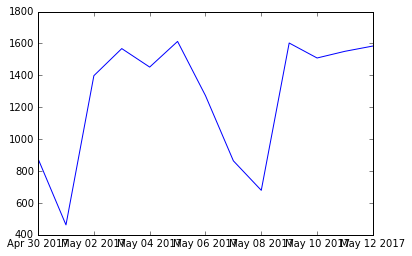

In [13]:
plt.plot(time,entries)

# challenge 5
 for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [14]:
# we want the sum of entries for each unique C/A, UNIT, STATION and DATE
# Dictionary keys are tuples -- must be unique, so we are constructing the first dictionary with --  
#--C/A, UNIT, STATION and DATE as keys
tsall = defaultdict(list)
for key, value in daily.items():
    for date, count in value:
        tsallkey = (key[0],key[1],key[3],date)
        tsallvalue = (count)
        tsall[tsallkey].append(tsallvalue)

list(tsall.items())[0]

(('N184', 'R416', 'BEACH 90 ST', datetime.date(2017, 5, 11)),
 [286, 0, 384, 0, 227])

In [15]:
tscount = defaultdict(list)
for key, value in tsall.items(): 
    tscountkey = key[0:3]
    tscountvalue = (key[-1],sum(value))
    tscount[tscountkey].append(tscountvalue)

list(tscount.items())

[(('R244', 'R050', '59 ST'),
  [(datetime.date(2017, 5, 2), 12304),
   (datetime.date(2017, 5, 12), 13143),
   (datetime.date(2017, 5, 5), 13257),
   (datetime.date(2017, 4, 30), 6923),
   (datetime.date(2017, 5, 9), 12189),
   (datetime.date(2017, 5, 7), 6126),
   (datetime.date(2017, 5, 3), 13322),
   (datetime.date(2017, 5, 4), 12940),
   (datetime.date(2017, 5, 8), 4477),
   (datetime.date(2017, 5, 10), 14163),
   (datetime.date(2017, 5, 6), 11942),
   (datetime.date(2017, 5, 11), 13116),
   (datetime.date(2017, 5, 1), 4504)]),
 (('R515', 'R095', 'ASTORIA DITMARS'),
  [(datetime.date(2017, 5, 1), 8083),
   (datetime.date(2017, 5, 4), 18376),
   (datetime.date(2017, 5, 7), 11149),
   (datetime.date(2017, 5, 11), 18298),
   (datetime.date(2017, 5, 9), 17730),
   (datetime.date(2017, 5, 6), 16012),
   (datetime.date(2017, 5, 5), 18529),
   (datetime.date(2017, 5, 3), 18288),
   (datetime.date(2017, 5, 8), 9395),
   (datetime.date(2017, 5, 10), 33530),
   (datetime.date(2017, 5, 2), 18

# challenge 6
combine everything in each station and come up with a time series [(date1, count1),(date2,count2),...]

In [31]:
bystation= defaultdict(list)
for k,v in tscount.items():
    for date,entries in v:
        bystationkey = k[2]
        bystationvalues = [date,entries]
        bystation[bystationkey].append(bystationvalues)
    
list(bystation.items())

[('207 ST',
  [[datetime.date(2017, 5, 11), 7333],
   [datetime.date(2017, 4, 30), 5427],
   [datetime.date(2017, 5, 6), 6605],
   [datetime.date(2017, 5, 9), 7136],
   [datetime.date(2017, 5, 5), 7369],
   [datetime.date(2017, 5, 2), 6838],
   [datetime.date(2017, 5, 12), 7216],
   [datetime.date(2017, 5, 4), 7354],
   [datetime.date(2017, 5, 1), 3931],
   [datetime.date(2017, 5, 8), 3966],
   [datetime.date(2017, 5, 7), 5370],
   [datetime.date(2017, 5, 10), 7178],
   [datetime.date(2017, 5, 3), 6914]]),
 ('INTERVALE AV',
  [[datetime.date(2017, 5, 11), 3786],
   [datetime.date(2017, 4, 30), 2203],
   [datetime.date(2017, 5, 10), 7352],
   [datetime.date(2017, 5, 6), 3369],
   [datetime.date(2017, 5, 8), 1647],
   [datetime.date(2017, 5, 3), 3740],
   [datetime.date(2017, 5, 7), 2158],
   [datetime.date(2017, 5, 5), 3845],
   [datetime.date(2017, 5, 12), 3684],
   [datetime.date(2017, 5, 2), 3538],
   [datetime.date(2017, 5, 1), 1606],
   [datetime.date(2017, 5, 9), 3686],
   [dateti

# challenge 7

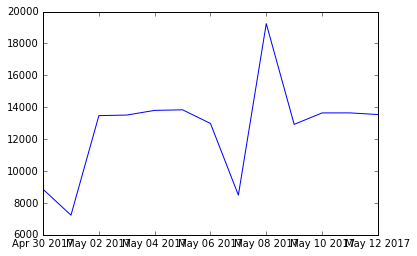

In [39]:
#TIMES SQ-42 ST

bystation['ELMHURST AV']

date = [item[0] for item in sorted(bystation['ELMHURST AV'])]
traffic = [item[1] for item in sorted(bystation['ELMHURST AV'])]
plt.plot(date,traffic)

# challenge 8 

In [33]:
#add day of week to the bystation dictionary
for k,v in bystation.items():
    for date in v:
         date.append(date[0].strftime('%A'))

('207 ST',
 [[datetime.date(2017, 5, 11), 7333, 'Thursday'],
  [datetime.date(2017, 4, 30), 5427, 'Sunday'],
  [datetime.date(2017, 5, 6), 6605, 'Saturday'],
  [datetime.date(2017, 5, 9), 7136, 'Tuesday'],
  [datetime.date(2017, 5, 5), 7369, 'Friday'],
  [datetime.date(2017, 5, 2), 6838, 'Tuesday'],
  [datetime.date(2017, 5, 12), 7216, 'Friday'],
  [datetime.date(2017, 5, 4), 7354, 'Thursday'],
  [datetime.date(2017, 5, 1), 3931, 'Monday'],
  [datetime.date(2017, 5, 8), 3966, 'Monday'],
  [datetime.date(2017, 5, 7), 5370, 'Sunday'],
  [datetime.date(2017, 5, 10), 7178, 'Wednesday'],
  [datetime.date(2017, 5, 3), 6914, 'Wednesday']])

In [44]:
sorted(bystation['ELMHURST AV'])
#for some reason 4/29 is not showing up in my data....need more investigation on that

[[datetime.date(2017, 4, 30), 8854, 'Sunday'],
 [datetime.date(2017, 5, 1), 7231, 'Monday'],
 [datetime.date(2017, 5, 2), 13475, 'Tuesday'],
 [datetime.date(2017, 5, 3), 13511, 'Wednesday'],
 [datetime.date(2017, 5, 4), 13804, 'Thursday'],
 [datetime.date(2017, 5, 5), 13840, 'Friday'],
 [datetime.date(2017, 5, 6), 12984, 'Saturday'],
 [datetime.date(2017, 5, 7), 8490, 'Sunday'],
 [datetime.date(2017, 5, 8), 19246, 'Monday'],
 [datetime.date(2017, 5, 9), 12927, 'Tuesday'],
 [datetime.date(2017, 5, 10), 13645, 'Wednesday'],
 [datetime.date(2017, 5, 11), 13647, 'Thursday'],
 [datetime.date(2017, 5, 12), 13543, 'Friday']]

In [53]:
dayofweek = [item[2] for item in sorted(bystation['ELMHURST AV'])]
traffic = [item[1] for item in sorted(bystation['ELMHURST AV'])]
traffic[0:7]


[8854, 7231, 13475, 13511, 13804, 13840, 12984]

In [45]:
dayofweek 

['Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday']

([<matplotlib.axis.XTick at 0x12ccb10b8>,
 <a list of 6 Text xticklabel objects>)

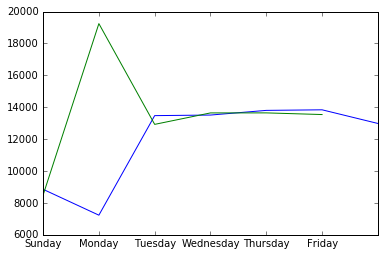

In [54]:
plt.plot(traffic[0:7])
plt.plot(traffic[7:])
plt.xticks([0,1,2,3,4,5],dayofweek[0:7])

# challenge 9
sum the total ridership at a station during multiple weeks

In [66]:
bystation['ELMHURST AV']

[[datetime.date(2017, 5, 1), 7231, 'Monday'],
 [datetime.date(2017, 5, 8), 19246, 'Monday'],
 [datetime.date(2017, 5, 6), 12984, 'Saturday'],
 [datetime.date(2017, 5, 7), 8490, 'Sunday'],
 [datetime.date(2017, 4, 30), 8854, 'Sunday'],
 [datetime.date(2017, 5, 9), 12927, 'Tuesday'],
 [datetime.date(2017, 5, 12), 13543, 'Friday'],
 [datetime.date(2017, 5, 4), 13804, 'Thursday'],
 [datetime.date(2017, 5, 5), 13840, 'Friday'],
 [datetime.date(2017, 5, 11), 13647, 'Thursday'],
 [datetime.date(2017, 5, 3), 13511, 'Wednesday'],
 [datetime.date(2017, 5, 2), 13475, 'Tuesday'],
 [datetime.date(2017, 5, 10), 13645, 'Wednesday']]

In [67]:
sumstation = defaultdict(list)
for k, v in bystation.items():
    allentries = 0
    for date, entries, dayofweek in v:
        allentries += entries
    sumstation[k].append(allentries )
list(sumstation.items())[0]

('207 ST', [82637])

In [70]:
sumstation['ELMHURST AV']

[165197]